In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import catboost as cb
#import lightgbm as lgb
#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



In [6]:
X_train = pd.read_csv("train/X_train.csv")
y_train = pd.read_csv("train/y_train.csv")

X_val = pd.read_csv("validation/X_val.csv")
y_val = pd.read_csv("validation/y_val.csv")

X_test = pd.read_csv("test/X_test.csv")
y_test = pd.read_csv("test/y_test.csv")

In [43]:
# Plot data
X_train


,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,avg_temp,avg_humidity,avg_wind_speed,avg_pressure,...,generation other,generation other renewable,generation waste,forecast solar day ahead,forecast wind onshore day ahead,price day ahead,price actual,total_load_actual_lag_1,total_load_actual_lag_12,total_load_actual_lag_24
0,0.500000,0.866025,0.433884,-0.900969,-0.258819,9.659258e-01,-1.883161,0.358824,-0.133333,-0.003509,...,-1.174387,-1.738731,-1.571429,-0.222439,1.937357,-2.727627,0.431993,-0.319406,-0.852823,-0.556893
1,0.500000,0.866025,-0.433884,-0.900969,0.000000,1.000000e+00,-1.906914,0.364706,-0.200000,-0.003509,...,-1.174387,-1.837975,-1.600000,-0.210752,1.797668,-2.932844,0.040551,-0.271518,-0.715892,-0.798730
2,0.500000,0.866025,-0.433884,-0.900969,0.258819,9.659258e-01,-1.960794,0.376471,-0.133333,-0.005664,...,-1.192071,-1.934489,-1.600000,-0.207635,1.719250,-3.069655,-0.224166,-0.661010,-0.724029,-1.277863
3,0.500000,0.866025,-0.433884,-0.900969,0.500000,8.660254e-01,-1.977205,0.376471,-0.133333,-0.005664,...,-1.192071,-2.043115,-1.400000,-0.211921,1.524691,-3.138061,-0.209381,-1.120336,-1.021703,-1.786469
4,0.500000,0.866025,-0.433884,-0.900969,0.707107,7.071068e-01,-1.976415,0.382353,-0.133333,-0.004946,...,-1.192071,-1.837975,-1.400000,-0.212310,1.475766,-3.138061,-0.338923,-1.349206,-1.148530,-2.239994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24523,-0.866025,0.500000,0.433884,-0.900969,-1.000000,-1.836970e-16,0.107636,0.029412,0.333333,-0.031528,...,0.321611,1.705570,0.328571,-0.182314,0.630087,1.248105,1.185308,0.384229,0.265067,0.791534
24524,-0.866025,0.500000,0.433884,-0.900969,-0.965926,2.588190e-01,0.006774,0.164706,0.066667,-0.029372,...,0.222630,1.831224,0.371429,-0.197896,0.650206,0.873926,0.882574,0.782847,0.367091,0.571652
24525,-0.866025,0.500000,0.433884,-0.900969,-0.866025,5.000000e-01,-0.018019,0.152941,0.066667,-0.025780,...,-0.389783,1.831224,0.400000,-0.220880,0.672611,0.555840,0.498876,0.549365,0.428623,-0.041314
24526,-0.866025,0.500000,0.433884,-0.900969,-0.707107,7.071068e-01,-0.090571,0.152941,-0.066667,-0.025062,...,-0.549616,0.744694,0.314286,-0.217374,0.627115,0.136514,0.078568,-0.059174,0.522165,-0.396345


In [49]:
y_train

,total load actual
0,-0.271518
1,-0.661010
2,-1.120336
3,-1.349206
4,-1.494756
...,...
24523,0.782847
24524,0.549365
24525,-0.059174
24526,-0.389811


### Regression

Test Mean Squared Error: 0.04687273002092838
Test R^2: 0.9532254999047635


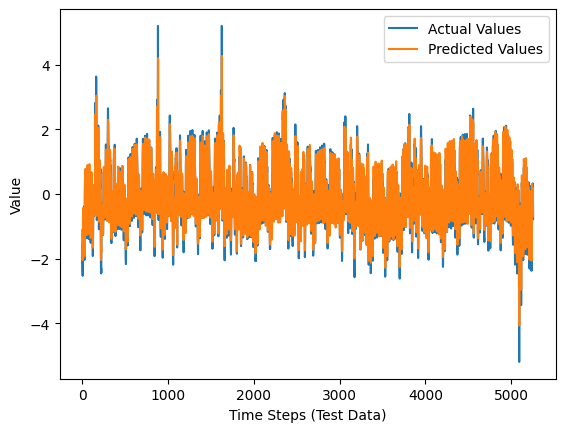

In [44]:
degrees = [1, 2, 3, 4]
validation_errors = []
best_degree=1

"""for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Train a linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on the validation set and calculate error
    y_val_pred = model.predict(X_val_poly)
    val_mse = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(val_mse)
    
    print(f"Degree: {degree}, Validation MSE: {val_mse}")

# Select the best polynomial degree based on the lowest validation error
best_degree = degrees[np.argmin(validation_errors)]
print(f"Best Polynomial Degree: {best_degree}")"""

# Combine training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Create polynomial features with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_val_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_test)

# Train the model on the combined training and validation set
final_model = LinearRegression()
final_model.fit(X_train_val_poly, y_train_val)

# Predict on the test set
y_test_pred = final_model.predict(X_test_poly)

# Calculate the Mean Squared Error
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R^2: {test_r2}")

# Plot actual vs predicted values for the test set
plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_test_pred)), y_test_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()


### Neural Network

/Users/villiarnar/Desktop/IT3212 - Datadrevet Programvare/IT3212/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.03922942100748515
R^2: 0.9608527910400909


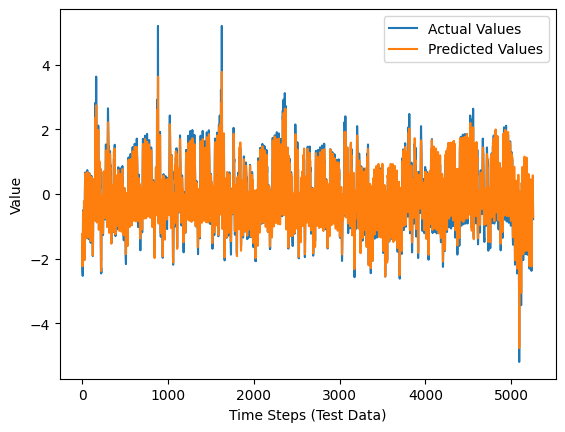

In [45]:
#neural network
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

# Plot actual vs predicted values for the test set
plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()

### Decision Tree

Mean Squared Error Decision Tree: 0.049474900699324635
R^2 Decision Tree: 0.9506287825258073


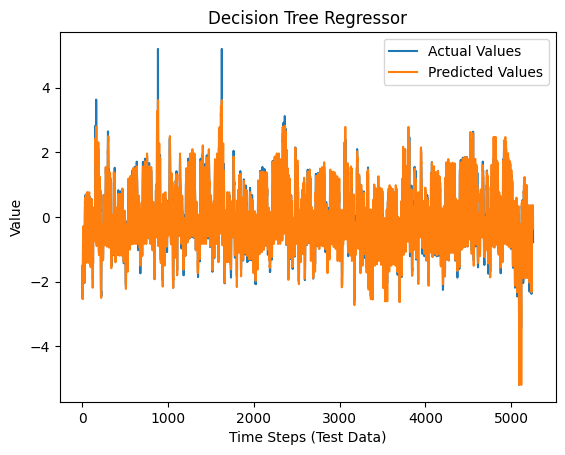

In [46]:
# Decision tree regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error Decision Tree: {mse_dt}")
print(f"R^2 Decision Tree: {r2_dt}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred_dt)), y_pred_dt, label="Predicted Values")
plt.legend()
plt.title("Decision Tree Regressor")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()

### Random forrest

/Users/villiarnar/Desktop/IT3212 - Datadrevet Programvare/IT3212/.venv/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error Random Forest: 0.020662428884761677
R^2 Random Forest: 0.9793808728143938


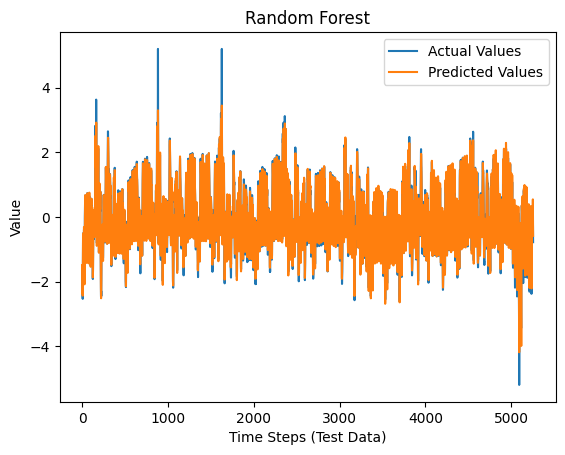

In [47]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train, )
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error Random Forest: {mse_rf}")
print(f"R^2 Random Forest: {r2_rf}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Predicted Values")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()

### SVM with kernel

/Users/villiarnar/Desktop/IT3212 - Datadrevet Programvare/IT3212/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error SVM: 0.05347714722810334
R^2 SVM: 0.9466349233979533


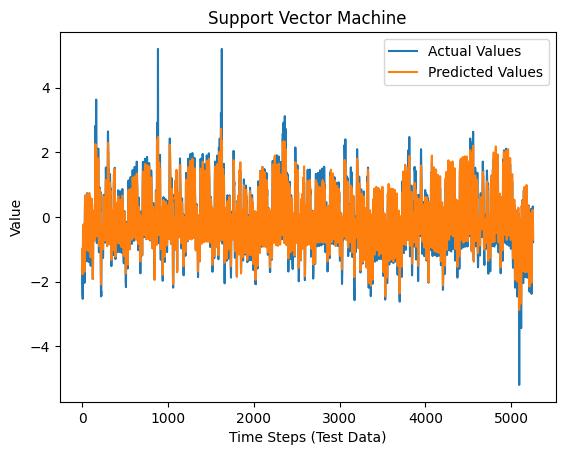

In [48]:
# SVM regressor (Support Vector Machine)
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"Mean Squared Error SVM: {mse_svm}")
print(f"R^2 SVM: {r2_svm}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred_svm)), y_pred_svm, label="Predicted Values")
plt.legend()
plt.title("Support Vector Machine")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()

In [17]:
print(len(X_train.columns))

35


Mean Squared Error GAM: 0.030571187686093442
R^2 GAM: 0.9694928795336605


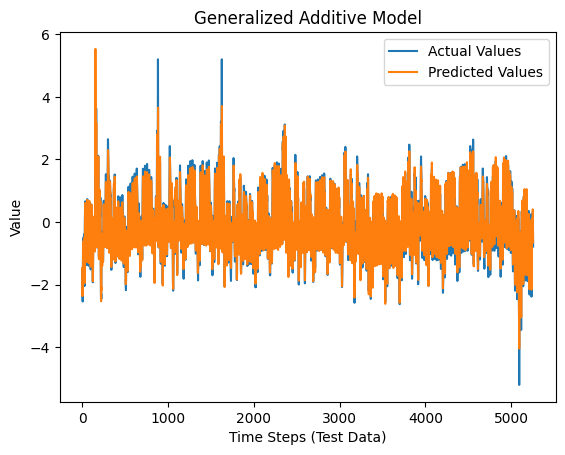

In [26]:
# additive model gam 
from pygam import LinearGAM, s

n_features = X_train.shape[1]
terms = [s(i) for i in range(n_features)]
terms = s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) 
model_gam = LinearGAM(terms)
model_gam.fit(X_train, y_train)
y_pred_gam = model_gam.predict(X_test)

mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print(f"Mean Squared Error GAM: {mse_gam}")
print(f"R^2 GAM: {r2_gam}")

plt.plot(range(len(y_test)), y_test, label="Actual Values")
plt.plot(range(len(y_pred_gam)), y_pred_gam, label="Predicted Values")
plt.legend()
plt.title("Generalized Additive Model")
plt.xlabel("Time Steps (Test Data)")
plt.ylabel("Value")
plt.show()
